In [39]:
def build_download_url(
    api_key,
    ticker,
    start_date,
    end_date,
    sampling_interval,
    after_hours
):
    """Documentation: https://www.tiingo.com/documentation/iex"""

    start_date_str= start_date.strftime("%Y-%m-%d")
    end_date_str= end_date.strftime("%Y-%m-%d")
    after_hours_str= "true" if after_hours else "false"

    return (
        f"https://api.tiingo.com/iex/{ticker}/prices?"
        f"token={api_key}&"
        f"startDate={start_date_str}&"
        f"endDate={end_date_str}&"
        f"resampleFreq={sampling_interval}min&"
        f"afterHours={after_hours_str}&"
        f"format=csv"
    )

In [40]:
from datetime import datetime, timedelta
import requests

def download_ticker(
    api_key: str,
    ticker: str,
    start_date : datetime,
    end_date : datetime,
    sampling_interval: int,
    after_hours: bool,
):
    url = build_download_url(
        api_key, 
        ticker, 
        start_date, 
        end_date, 
        sampling_interval, 
        after_hours)
    
    print(
        f"Retrieving {ticker} from {start_date} to {end_date} on {sampling_interval}m - {url}"
    )

    return make_request_with_retry(url)


def make_request_with_retry(url, retries=5, delay=1):
    headers = {"Content-Type": "application/json"}
    for attempt in range(retries + 1):
        try:
            response = requests.get(url, headers)
            response.raise_for_status()  # Raise an exception for non-2xx responses
            return response.text
        except requests.RequestException as e:
            if response.status_code == 404:
                print(f"404 error: {e}")
                return None
            if attempt < retries:
                print(f"Transient error occurred. Retrying in {delay} seconds...")
                time.sleep(delay)
                delay *= 2  # Exponential backoff
            else:
                print(f"Error: {e}")
                raise

In [137]:
import matplotlib.pyplot as plt
import importlib

import classes_calc

# Reload the module when changes are made
importlib.reload(classes_calc)

<module 'classes_calc' from 'C:\\Users\\User\\AAAMio\\Projects\\PyTorch\\classes_calc.py'>

In [138]:
classes_window= 52
down_pcts= [5, 10, 15]
up_pcts= [5, 10, 15]
calculator = classes_calc.ClassesCalc(classes_window, down_pcts, up_pcts)

In [139]:
csv_data2020= download_ticker("55daa0bf5f29eb5b33b56c9f996afe5eb2dae346", "DNA", datetime(2020, 1, 1), datetime(2021,1,1), 15, False)
csv_data2021= download_ticker("55daa0bf5f29eb5b33b56c9f996afe5eb2dae346", "DNA", datetime(2021, 1, 1), datetime(2022,1,1), 15, False)
csv_data2022= download_ticker("55daa0bf5f29eb5b33b56c9f996afe5eb2dae346", "DNA", datetime(2022, 1, 1), datetime(2023,1,1), 15, False)
csv_data2023= download_ticker("55daa0bf5f29eb5b33b56c9f996afe5eb2dae346", "DNA", datetime(2023, 1, 1), datetime(2023,11,11), 15, False)

Retrieving DNA from 2020-01-01 00:00:00 to 2021-01-01 00:00:00 on 15m - https://api.tiingo.com/iex/DNA/prices?token=55daa0bf5f29eb5b33b56c9f996afe5eb2dae346&startDate=2020-01-01&endDate=2021-01-01&resampleFreq=15min&afterHours=false&format=csv
Retrieving DNA from 2021-01-01 00:00:00 to 2022-01-01 00:00:00 on 15m - https://api.tiingo.com/iex/DNA/prices?token=55daa0bf5f29eb5b33b56c9f996afe5eb2dae346&startDate=2021-01-01&endDate=2022-01-01&resampleFreq=15min&afterHours=false&format=csv
Retrieving DNA from 2022-01-01 00:00:00 to 2023-01-01 00:00:00 on 15m - https://api.tiingo.com/iex/DNA/prices?token=55daa0bf5f29eb5b33b56c9f996afe5eb2dae346&startDate=2022-01-01&endDate=2023-01-01&resampleFreq=15min&afterHours=false&format=csv
Retrieving DNA from 2023-01-01 00:00:00 to 2023-11-11 00:00:00 on 15m - https://api.tiingo.com/iex/DNA/prices?token=55daa0bf5f29eb5b33b56c9f996afe5eb2dae346&startDate=2023-01-01&endDate=2023-11-11&resampleFreq=15min&afterHours=false&format=csv


In [140]:
# Concatenate list skipping the header row
#csv_data=csv_data2020+ "\n" + csv_data2021[1:-1]+ "\n" + csv_data2022[1:-1]+ "\n" + csv_data2023[1:-1]
#len(csv_data)

In [141]:
import io
import pandas as pd

df2020 = pd.read_csv(io.StringIO(csv_data2020))
df2021 = pd.read_csv(io.StringIO(csv_data2021))
df2022 = pd.read_csv(io.StringIO(csv_data2022))
df2023 = pd.read_csv(io.StringIO(csv_data2023))
df = pd.concat([df2020, df2021, df2022, df2023], axis=0, ignore_index=True)

C:\Users\User\AppData\Local\Temp\ipykernel_25592\4205077265.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df2020, df2021, df2022, df2023], axis=0, ignore_index=True)


In [142]:
close_list = df['close'].astype(float).tolist()
close_list

[10.22,
 10.18,
 10.17,
 10.17,
 10.17,
 10.17,
 10.17,
 10.17,
 10.17,
 10.17,
 10.17,
 10.17,
 10.07,
 10.07,
 10.07,
 10.07,
 10.07,
 10.07,
 10.07,
 10.07,
 10.07,
 10.07,
 10.07,
 10.07,
 10.07,
 10.085,
 10.07,
 10.07,
 10.05,
 10.05,
 10.05,
 10.05,
 10.09,
 10.09,
 10.14,
 10.08,
 10.08,
 10.08,
 10.08,
 10.08,
 10.08,
 10.13,
 10.13,
 10.07,
 10.07,
 10.07,
 10.12,
 10.12,
 10.12,
 10.09,
 10.09,
 10.11,
 10.11,
 10.11,
 10.09,
 10.09,
 10.09,
 10.09,
 10.09,
 10.09,
 10.09,
 10.12,
 10.12,
 10.12,
 10.12,
 10.12,
 10.12,
 10.12,
 10.12,
 10.12,
 10.165,
 10.15,
 10.205,
 10.205,
 10.21,
 10.21,
 10.21,
 10.21,
 10.2,
 10.21,
 10.26,
 10.26,
 10.26,
 10.215,
 10.215,
 10.325,
 10.39,
 10.29,
 10.3,
 10.35,
 10.255,
 10.255,
 10.29,
 10.29,
 10.285,
 10.285,
 10.29,
 10.29,
 10.29,
 10.37,
 10.355,
 10.355,
 10.355,
 10.43,
 10.43,
 10.425,
 10.435,
 10.435,
 10.415,
 10.415,
 10.415,
 10.415,
 10.415,
 10.415,
 10.415,
 10.415,
 10.405,
 10.405,
 10.405,
 10.435,
 10.44,
 10.4

In [143]:
classes= calculator.calculate(close_list)
print(classes[-classes_window-1:-classes_window+1])

[0, nan]


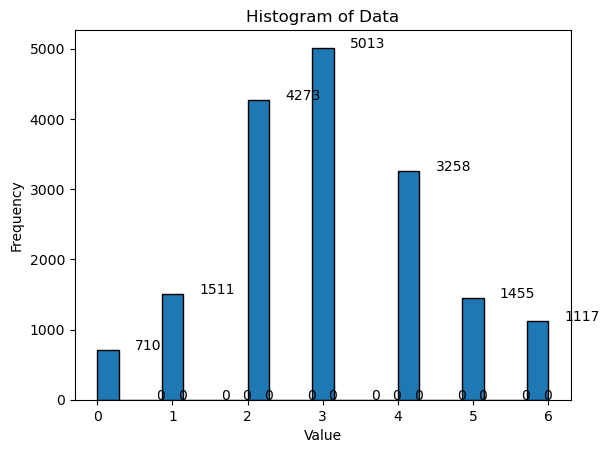

In [144]:
import matplotlib.pyplot as plt

# Create a histogram
hist_values, bin_edges, _ = plt.hist(classes, bins=21, edgecolor='black')

# Add labels and a title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data')

# Display frequency on top of each bar
for value, edge in zip(hist_values, bin_edges[:-1]):
    plt.text(edge + 0.5, value + 0.1, str(int(value)), color='black')
    
# Show the histogram
plt.show()


In [145]:
from collections import Counter

# Calculate the frequency of each element
frequency_dict = Counter(classes)

# Print the result
num_ticks= len(classes)
print(f"Stock ticks: {num_ticks}")
for element, frequency in frequency_dict.items():
    percent=0
    position= element - len(down_pcts)
    if position < 0:
        percent= -1 * down_pcts[-1 * position - 1] 
    elif position > 0:
        percent= up_pcts[position - 1]
        
    print(f"{percent}% change ({element}): {frequency} times {(frequency/num_ticks*100):0.2f}%")


Stock ticks: 17389
0% change (3): 5013 times 28.83%
-5% change (2): 4273 times 24.57%
10% change (5): 1455 times 8.37%
15% change (6): 1117 times 6.42%
5% change (4): 3258 times 18.74%
-10% change (1): 1511 times 8.69%
-15% change (0): 710 times 4.08%
0% change (nan): 52 times 0.30%


In [146]:
import importlib

import signals_calc

# Reload the module when changes are made
importlib.reload(signals_calc)

signal_windows= [2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584]
signals_calculator = signals_calc.SignalsCalc(signal_windows)

windows_rolling_avg = signals_calculator.calculate(close_list)
windows_rolling_avg

[[nan,
  10.2,
  10.174999999999999,
  10.169999999999998,
  10.169999999999998,
  10.169999999999998,
  10.169999999999998,
  10.169999999999998,
  10.169999999999998,
  10.169999999999998,
  10.169999999999998,
  10.169999999999998,
  10.119999999999997,
  10.069999999999997,
  10.069999999999997,
  10.069999999999997,
  10.069999999999997,
  10.069999999999997,
  10.069999999999997,
  10.069999999999997,
  10.069999999999997,
  10.069999999999997,
  10.069999999999997,
  10.069999999999997,
  10.069999999999997,
  10.077499999999997,
  10.077499999999997,
  10.069999999999997,
  10.059999999999997,
  10.049999999999997,
  10.049999999999997,
  10.049999999999997,
  10.069999999999997,
  10.089999999999996,
  10.114999999999997,
  10.109999999999996,
  10.079999999999995,
  10.079999999999995,
  10.079999999999995,
  10.079999999999995,
  10.079999999999995,
  10.104999999999995,
  10.129999999999995,
  10.099999999999994,
  10.069999999999993,
  10.069999999999993,
  10.094999999999

In [147]:
print(len(close_list))
print(len(windows_rolling_avg[len(signal_windows)-1]))


17389
17389


In [148]:
from typing import List

@staticmethod
def calculate_price_proportions(prices: List[float], averages_list: List[List[float]]) -> List[List[float]]:
    list_of_list_proportions= []
    for averages in averages_list:
        list_proportions= []
        for idx in range(len(averages)):
            list_proportions.append((prices[idx]-averages[idx])/prices[idx])

        list_of_list_proportions.append(list_proportions)

    return list_of_list_proportions

In [149]:
proportions= calculate_price_proportions(close_list, windows_rolling_avg)


In [150]:
print(close_list[-10:])
print(windows_rolling_avg[0][-10:])
print(proportions[0][-10:])
current_sum = sum(close_list[-2:])/2
classes_len= len(classes)
signal_windows_len= len(signal_windows)

print(f"Signal window last: {signal_windows[-1]} len: {signal_windows_len}")
print(f"Classes last non-nan: {classes[-classes_window-1:-classes_window+1]} len: {classes_len}")
print(f"Proportions first non-nan: {proportions[signal_windows_len-1][signal_windows[-1]-2:signal_windows[-1]]} len: {len(proportions[signal_windows_len-1])}")
print(f"Proportions {signal_windows[0]} Min: {min(proportions[0][signal_windows[0]-1:-classes_window-1])} Max: {max(proportions[0][signal_windows[0]-1:-classes_window])}")
print(f"Proportions {signal_windows[-1]} Min: {min(proportions[-1][signal_windows[-1]-1:-classes_window-1])} Max: {max(proportions[-1][signal_windows[-1]-1:-classes_window])}")

[1.255, 1.255, 1.255, 1.265, 1.285, 1.285, 1.265, 1.265, 1.265, 1.275]
[1.252500000000032, 1.2550000000000319, 1.2550000000000319, 1.2600000000000318, 1.2750000000000319, 1.285000000000032, 1.2750000000000319, 1.2650000000000319, 1.2650000000000319, 1.270000000000032]
[0.00199203187248444, -2.5477627975461762e-14, -2.5477627975461762e-14, 0.003952569169935289, 0.007782101167290299, -2.4882819540236975e-14, -0.007905138339946232, -2.5276223801742697e-14, -2.5276223801742697e-14, 0.003921568627425819]
Signal window last: 2584 len: 16
Classes last non-nan: [0, nan] len: 17389
Proportions first non-nan: [nan, 0.0010667620069820748] len: 17389
Proportions 2 Min: -0.08264462809917836 Max: 0.08449946178686112
Proportions 2584 Min: -2.162611895734038 Max: 0.40492674483802216


In [151]:
# Cutting from first non-nan in the signal_windows[-1] to last non-nan in the classes
targets = classes[signal_windows[-1]-1:-classes_window]
print(f"First target: {targets[0]} and last target: {targets[-1]}")
print(f"Classes: {len(classes)} cut to targets: {len(targets)}")
inputs = []
for proportion in proportions:
    proportion_cut=proportion[signal_windows[-1]-1:-classes_window]
    print(proportion_cut[0:2])
    inputs.append(proportion_cut)
    
print(f"Inputs {len(inputs[len(signal_windows)-1])}")
print(f"Distinct targets: {list(set(targets))}")


First target: 3 and last target: 0
Classes: 17389 cut to targets: 14754
[-1.067950003647445e-15, -1.067950003647445e-15]
[3.3818416782169095e-15, 3.3818416782169095e-15]
[-0.00020040080160540924, -2.13590000729489e-15]
[-0.0005010020040093402, -0.00037575150300745016]
[-0.0006551564667889754, -0.0005780792354032516]
[-0.00019085790629083202, -0.00021471514457683006]
[0.00020629494282539654, 0.00017682423670730476]
[0.0005465476407353424, 0.0005192202586986375]
[0.0007205422080100994, 0.0007036545000097945]
[0.0009219828545974838, 0.0009150244934305934]
[0.0010708111502064873, 0.0010557595878543562]
[0.001008648596935527, 0.0010113064325005213]
[0.0002004008015998915, 0.00018643845066879528]
[0.003177073498579978, 0.0031745354945070295]
[0.003088518928908605, 0.0030878914999742354]
[0.0010667620069820748, 0.0010760685457564339]
Inputs 14754
Distinct targets: [0, 1, 2, 3, 4, 5, 6]


In [152]:
import torch

# TODO: Only 4 decimals in the X values, should not be more? How to increase?
X = torch.Tensor(inputs)
X = X.T
y = torch.Tensor(targets)

In [153]:
train_split= int(0.8 * len(X))
X_train, y_train= X[:train_split], y[:train_split]
X_test, y_test= X[train_split:], y[train_split:]

In [154]:
print(f"X_train shape: {X_train.shape} y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape} y_test shape: {y_test.shape}")
print(f"X_train: {X_train}")

X_train shape: torch.Size([11803, 16]) y_train shape: torch.Size([11803])
X_test shape: torch.Size([2951, 16]) y_test shape: torch.Size([2951])
X_train: tensor([[-1.0680e-15,  3.3818e-15, -2.0040e-04,  ...,  3.1771e-03,
          3.0885e-03,  1.0668e-03],
        [-1.0680e-15,  3.3818e-15, -2.1359e-15,  ...,  3.1745e-03,
          3.0879e-03,  1.0761e-03],
        [-1.0680e-15,  3.3818e-15, -2.1359e-15,  ...,  3.1720e-03,
          3.0873e-03,  1.0838e-03],
        ...,
        [-2.0991e-14,  5.4833e-14, -6.4309e-04,  ...,  1.3473e-01,
          1.4945e-01,  5.3037e-02],
        [-2.0991e-14,  5.4833e-14, -6.4309e-04,  ...,  1.3457e-01,
          1.4935e-01,  5.3116e-02],
        [ 3.1949e-03,  4.2599e-03,  5.1118e-03,  ...,  1.3994e-01,
          1.5467e-01,  5.9241e-02]])


In [155]:
device = "cuda" if torch.cuda.is_available() else "cpu"

X_train, y_train= X_train.to(device), y_train.to(device).to(torch.int64)
X_test, y_test= X_test.to(device), y_test.to(device).to(torch.int64)

print(f"X_train shape: {X_train.shape} type: {X_train.dtype} y_train shape: {y_train.shape} type: {y_train.dtype}")
print(f"X_test shape: {X_test.shape} y_test shape: {y_test.shape}")
print(f"X_train: {X_train}")
print(f"y_train: {y_train}")

X_train shape: torch.Size([11803, 16]) type: torch.float32 y_train shape: torch.Size([11803]) type: torch.int64
X_test shape: torch.Size([2951, 16]) y_test shape: torch.Size([2951])
X_train: tensor([[-1.0680e-15,  3.3818e-15, -2.0040e-04,  ...,  3.1771e-03,
          3.0885e-03,  1.0668e-03],
        [-1.0680e-15,  3.3818e-15, -2.1359e-15,  ...,  3.1745e-03,
          3.0879e-03,  1.0761e-03],
        [-1.0680e-15,  3.3818e-15, -2.1359e-15,  ...,  3.1720e-03,
          3.0873e-03,  1.0838e-03],
        ...,
        [-2.0991e-14,  5.4833e-14, -6.4309e-04,  ...,  1.3473e-01,
          1.4945e-01,  5.3037e-02],
        [-2.0991e-14,  5.4833e-14, -6.4309e-04,  ...,  1.3457e-01,
          1.4935e-01,  5.3116e-02],
        [ 3.1949e-03,  4.2599e-03,  5.1118e-03,  ...,  1.3994e-01,
          1.5467e-01,  5.9241e-02]], device='cuda:0')
y_train: tensor([3, 3, 3,  ..., 6, 6, 6], device='cuda:0')


In [156]:
import torch
from torch import nn

class StockModelV0(nn.Module):
  def __init__(self, input_features, output_features, hidden_units):
    """Initializes multi-class classification model"""
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
      nn.Linear(in_features=input_features, out_features=hidden_units),
      nn.ReLU(),
      nn.Linear(in_features=hidden_units, out_features=hidden_units),
      nn.ReLU(),
      nn.Linear(in_features=hidden_units, out_features=hidden_units),
      nn.ReLU(),
      nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    # print("forward x: ",", ".join([str(num) for num in x.tolist()]))
    # Layers are defined inside the Sequencial NN and will be applied here.
    return self.linear_layer_stack(x)

# Create an instance of the model
model_0 = StockModelV0(
  input_features=len(signal_windows),
  output_features=len(down_pcts)+ 1 + len(up_pcts),
  hidden_units=20).to(device)


In [157]:
from torchmetrics import Accuracy

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)
accuracy_fn= Accuracy(task='multiclass', num_classes=len(down_pcts)+ 1 + len(up_pcts)).to(device)

In [162]:
print(y_train)
print(y_train.dtype)
model_0.eval()
with torch.inference_mode():
    y_logits= model_0(X_train)
    print(y_logits)
    y_pred= torch.argmax(torch.softmax(y_logits, dim=1), dim=1)
    print(y_pred.dtype)



tensor([3, 3, 3,  ..., 6, 6, 6], device='cuda:0')
torch.int64
tensor([[-0.9901, -0.1528,  0.8816,  ...,  0.7006, -0.0175, -0.2629],
        [-0.9890, -0.1528,  0.8809,  ...,  0.7005, -0.0175, -0.2628],
        [-0.9882, -0.1527,  0.8803,  ...,  0.7005, -0.0176, -0.2627],
        ...,
        [-0.2726,  0.1731,  0.4349,  ...,  0.6946, -0.0418, -0.3198],
        [-0.2559,  0.1757,  0.4247,  ...,  0.6931, -0.0417, -0.3186],
        [-0.2792,  0.1874,  0.4509,  ...,  0.6920, -0.0427, -0.3173]],
       device='cuda:0')
torch.int64


In [163]:
epochs=10000

for epoch in range(epochs):
  # Training
  model_0.train()

  # Forward pass
  y_logits= model_0(X_train)
    
  # turn logits -> prediction probabilities -> prediction labels
  y_pred= torch.argmax(torch.softmax(y_logits, dim=1), dim=1)
  
  # Calculate loss and accuracy
  loss= loss_fn(y_logits, y_train)
  accuracy = accuracy_fn(y_pred, y_train)
    
  # Optimize zero grad
  optimizer.zero_grad()

  # Backpropagation
  loss.backward()

  # Gradient descent optimization
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    # Predict for test data
    test_logits= model_0(X_test)
    test_pred= torch.argmax(torch.softmax(test_logits, dim=1), dim=1)

    # Calculate test loss/accuracy
    test_loss= loss_fn(test_logits, y_test)
    test_accuracy = accuracy_fn(test_pred, y_test)

    if epoch % 100 == 0: 
      print(f"Epoch: {epoch} | Loss: {loss:.5f} Acc: {accuracy*100:.2f}% | Test loss: {test_loss:.5f} Test acc: {test_accuracy*100:.2f}%")



Epoch: 0 | Loss: 1.71815 Acc: 31.36% | Test loss: 1.84481 Test acc: 19.69%
Epoch: 100 | Loss: 1.71795 Acc: 31.33% | Test loss: 1.84837 Test acc: 19.96%
Epoch: 200 | Loss: 1.71801 Acc: 31.19% | Test loss: 1.85207 Test acc: 20.09%
Epoch: 300 | Loss: 1.71685 Acc: 31.12% | Test loss: 1.85389 Test acc: 20.13%
Epoch: 400 | Loss: 1.71648 Acc: 31.17% | Test loss: 1.85573 Test acc: 20.37%
Epoch: 500 | Loss: 1.71759 Acc: 31.21% | Test loss: 1.85829 Test acc: 20.54%
Epoch: 600 | Loss: 1.72051 Acc: 31.25% | Test loss: 1.86264 Test acc: 20.87%
Epoch: 700 | Loss: 1.71665 Acc: 31.37% | Test loss: 1.86081 Test acc: 21.11%
Epoch: 800 | Loss: 1.71390 Acc: 31.59% | Test loss: 1.85990 Test acc: 21.11%
Epoch: 900 | Loss: 1.71090 Acc: 31.77% | Test loss: 1.85947 Test acc: 21.01%
Epoch: 1000 | Loss: 1.70837 Acc: 31.77% | Test loss: 1.85886 Test acc: 21.08%
Epoch: 1100 | Loss: 1.70798 Acc: 31.91% | Test loss: 1.85999 Test acc: 21.21%
Epoch: 1200 | Loss: 1.70676 Acc: 32.05% | Test loss: 1.86031 Test acc: 21.04

In [166]:
print(f"Distinct y_test: {list(set(y_test.tolist()))}")
print(f"Distinct test_pred: {list(set(test_pred.tolist()))}")

Distinct y_test: [0, 1, 2, 3, 4, 5, 6]
Distinct test_pred: [0, 1, 2, 3, 4, 5, 6]


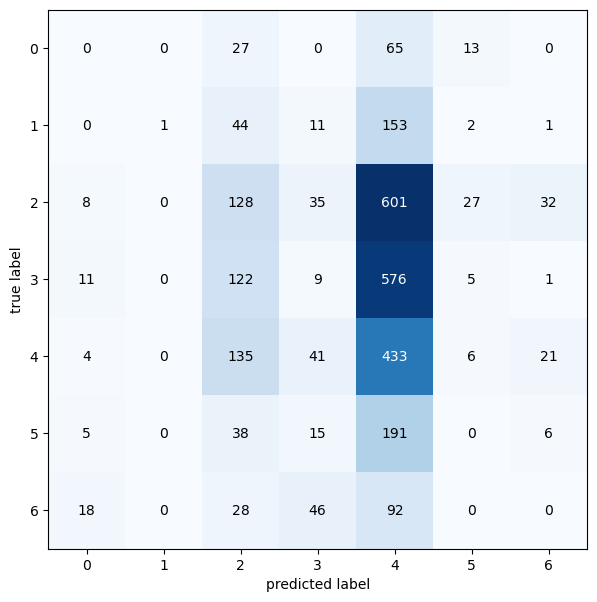

In [167]:
from torchmetrics import ConfusionMatrix
# plot_confusion_matrix will plot the metrix in a nicer way
from mlxtend.plotting import plot_confusion_matrix

confmat= ConfusionMatrix(
  task='multiclass',
  num_classes=len(down_pcts)+ 1 + len(up_pcts))

# test_data.targets are the values we want to predict in the test dataloader
confmat_tensor= confmat(
  preds= test_pred.cpu(),
  target= y_test.cpu())

# Plot the confusion matrix
fig, ax= plot_confusion_matrix(
  conf_mat= confmat_tensor.numpy(),
  figsize= (10, 7)
)
